In [1]:
import torch
import torch.nn as nn
import torchviz

In [2]:
torch.__version__

'1.3.1'

In [3]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 6, 5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = x.view(-1,1,28,28)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x


In [4]:
def layer_des(model_cls, x):
    model = model_cls()
    for layer in [module for module in model.modules() if type(module) != nn.Sequential][1:]:
        x = layer(x)
        print(layer.__class__.__name__,'Output shape:\t',x.shape)

In [5]:
layer_des(LeNet, torch.randn((1,1,28,28)))

Conv2d Output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid Output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d Output shape:	 torch.Size([1, 6, 14, 14])
Conv2d Output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid Output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d Output shape:	 torch.Size([1, 16, 5, 5])
Flatten Output shape:	 torch.Size([1, 400])
Linear Output shape:	 torch.Size([1, 120])
Sigmoid Output shape:	 torch.Size([1, 120])
Linear Output shape:	 torch.Size([1, 84])
Sigmoid Output shape:	 torch.Size([1, 84])
Linear Output shape:	 torch.Size([1, 10])


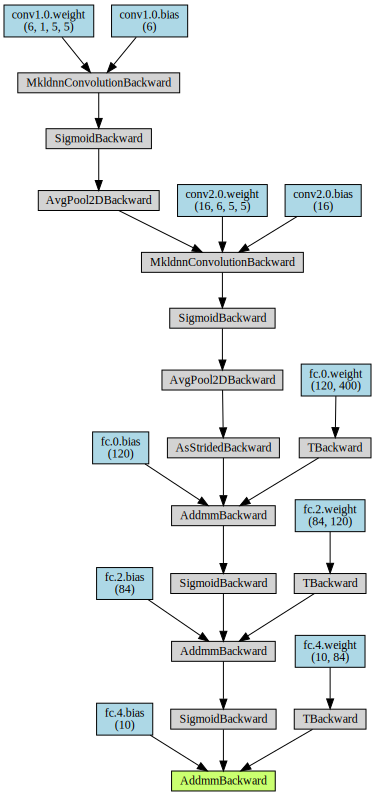

In [6]:
x = torch.randn((1,1,28,28))
model = LeNet()
torchviz.make_dot(model(x), params=dict(list(model.named_parameters()) + [('x', x)]))

In [7]:
# x = torch.randn((1,1,28,28))
# model = LeNet()

# with torch.onnx.set_training(model, False):
#     trace, _ = torch.jit.get_trace_graph(model, args=(x,))
# torchviz.make_dot_from_trace(trace)


In [8]:
torch.save(model, 'models/lenet_model.pt')

/Users/ring/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LeNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/ring/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/ring/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/ring/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sigmoid. It won't be checked for correctnes